# Monte Carlo Simulation for Asset Prices

In [5]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

Generating a simulated evolution of the asset price is done in three basic steps that can be done at once.

The first ingredient is the evolution of asset returns. Returns should have no information and they should look like a pure noise. One possibility is to model them as a normal random variable. The resulting sequence of these variables is in fact called a white noise.

Second, the returns should be added in order to represent the cumulative return over the observed interval. The sum of the noises is called a random walk and in the case of normal random variables, the resulting process is known as a Brownian motion (also called a Wiener process).

Knowing the (log) returns, the price simulation is obtained by exponentiation.

In [13]:
import seaborn as sns

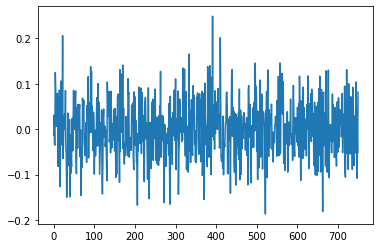

In [17]:
sns.lineplot(y = brownian_motion[1:] - brownian_motion[:-1],x = list(range(brownian_motion.shape[0] - 1)))

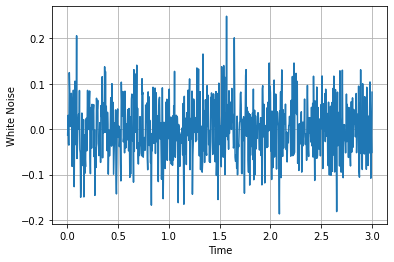

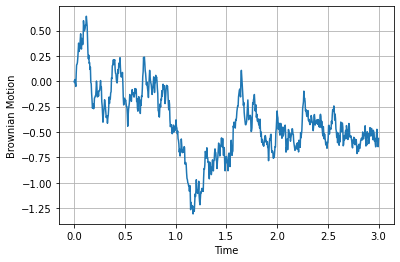

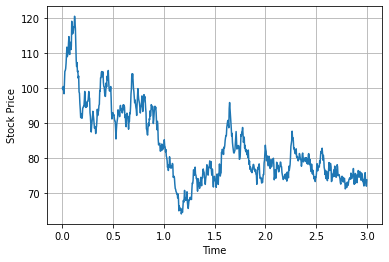

In [6]:
sigma =0.3
T = 3
sampling_points = 250*T
dt = T/sampling_points
time = np.arange(0,T + dt,dt)

np.random.seed(seed=12345)

noise = sp.norm.rvs(size = sampling_points)*np.sqrt(dt)
brownian_motion = np.cumsum(noise)
brownian_motion = np.append(0,brownian_motion)

stock =np.empty(sampling_points+1, dtype=float)
stock[0] = 100 
stock = stock[0]*np.exp(sigma*brownian_motion - 0.5*sigma**2*time)

plt.figure(1)
plt.plot(time[1:],noise)
plt.grid()
plt.xlabel('Time')
plt.ylabel('White Noise')
plt.show()

plt.figure(2)
plt.plot(time,brownian_motion)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Brownian Motion')
plt.show()


plt.figure(3)
plt.plot(time,stock)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()


Plot several such asset price evolution scenarios in one graph.

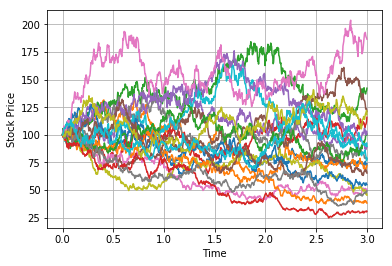

In [3]:
np.random.seed(seed=12345)

plt.figure(4)
for i in range(1,21):
    noise = sp.norm.rvs(size = sampling_points)*np.sqrt(dt)
    brownian_motion = np.cumsum(noise)
    brownian_motion = np.append(0,brownian_motion)

    stock =np.empty(sampling_points+1, dtype=float)
    stock[0] = 100
    stock = stock[0]*np.exp(sigma*brownian_motion - 0.5*sigma**2*time)
    
    plt.plot(time,stock)

plt.xlabel('Time')
plt.ylabel('Stock Price')    
plt.grid()    
plt.show()    

Example: Pricing a structured note.
    
The setup of the contract is the following. Take a specific underlying stock. Consider 6 monitoring intervals after 0.5 years. The client gets the following payoff.

1) When the stock exceeds 100% of its original value at the monitoring point, the client get (100 + 2.5)% and the contract is immediately terminated.

2) Each time when the stock is between 80% and 100% of its original value at the monitoring point, the client gets 2.5% as a form of a coupon payment. The payment is retroactive, so if the stock was below 80% at the previous monitoring points, the client gets 2.5% for each such situation.

3) The client has a capital protection at the end of the contract, he will receive 100% if the stock exceeds 60% of its original value. Otherwise he will collect the spot value (under 60%).
    

0
20000
40000
60000
80000
90.47740985295951
0.17281668431212704


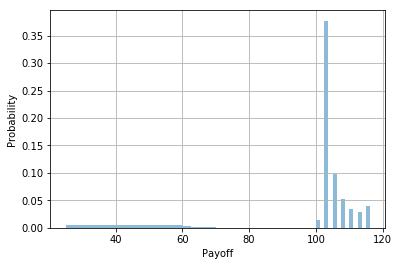

In [6]:
sigma =0.4
T = 3
sampling_points = 2*T
dt = T/sampling_points
time = np.arange(0,T + dt,dt)
 
simulations = 100000
payoff =np.empty(simulations, dtype=float)



for i in range(simulations):
    stock =np.empty(sampling_points+1, dtype=float)
    stock[0] = 100
    noise = sp.norm.rvs(size = sampling_points)*np.sqrt(dt)
    brownian_motion = np.cumsum(noise)
    brownian_motion = np.append(0,brownian_motion)
    stock = stock[0]*np.exp(sigma*brownian_motion - 0.5*sigma**2*time)

    if np.argmax(stock>100) != 0: 
            payoff[i] = 100+2.5*np.argmax(stock>100)
    else: 
        if stock[-1] < 60:
                    payoff[i] = stock[-1]+2.5*np.max(np.where(stock>80))
        else:
                    payoff[i] = 100+ 2.5*np.max(np.where(stock>80))     
            
    if i%20000 == 0:
        print(i)        
print(np.mean(payoff))            
print(1.96*np.std(payoff)/np.sqrt(simulations))

x=np.arange(25,117,2.5/2)
plt.hist(payoff, alpha=0.5,normed=True, bins=x)
plt.grid()
plt.xlabel('Payoff')
plt.ylabel('Probability')
plt.show()


In [13]:
0.15/np.sqrt(250)

0.009486832980505138

In [14]:
0.3/np.sqrt(2)

0.21213203435596423